In [1]:
import pandas as pd

C:\Users\HSS\Documents\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
C:\Users\HSS\Documents\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep = ';')
white_wine = pd.read_csv(white_url, sep = ';')

In [3]:
red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [22]:
X = wine.drop(['color'], axis = 1)
y = wine['color'] 

### 파이프라인 사용법
- `sklearn.pipline`
- `estimators`: 각 단계별로 사용할 함수의 별칭과 호출을 튜플의 리스트로 작성
- `Pipeline(estimators)`로 객체 생성

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()), ('clf',DecisionTreeClassifier())]

pipe = Pipeline(estimators)

### 파이프라인 객체 호출
- n번째 단계 파이프라인 사용하기: `pipe.steps[0]`
- 별칭을 사용해 직접 호출하기: `pipe[별칭]`
- 파라미터 사용하기: `pipe.set_params(별칭__파라미터 = x)`

In [11]:
pipe.steps

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))]

In [12]:
pipe.steps[0]

('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))

In [13]:
pipe.steps[1]

('clf',
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'))

In [15]:
pipe['clf']

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=13,
                                        splitter='best'))],
         verbose=False)

In [27]:
from sklearn.model_selection import train_test_split

x_scaled = pipe['scaler'].fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 13, stratify = y)
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=13,
                                        splitter='best'))],
         verbose=False)

### 성과측정

In [28]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train ACC: ', accuracy_score(y_test, y_pred_test))

Train ACC:  0.96


### 교차검증

In [17]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1,2],[3,4],[1,2],[3,4]])
y = np.array([1,2,3,4])

kf = KFold(n_splits = 2)


In [18]:
print(kf.get_n_splits(X))
print(kf)

2
KFold(n_splits=2, random_state=None, shuffle=False)


<generator object _BaseKFold.split at 0x0000022AE5D802B0>

In [17]:
for train_idx, test_idx, in kf.split(X):
    print('---- idx')
    print(train_idx, test_idx)
    print('---- train data')
    print(X[train_idx])
    print('---- val data')
    print(X[test_idx])

---- idx
[2 3] [0 1]
---- train data
[[1 2]
 [3 4]]
---- val data
[[1 2]
 [3 4]]
---- idx
[0 1] [2 3]
---- train data
[[1 2]
 [3 4]]
---- val data
[[1 2]
 [3 4]]


In [36]:
from sklearn.model_selection import train_test_split

X = wine.drop(['color'], axis = 1)
y = wine['color']

### 하이퍼파라미터 튜닝
- 그리드서치

In [38]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skfold = StratifiedKFold(n_splits = 5)
wine_tree_cv = DecisionTreeClassifier(max_depth = 2, random_state = 13)

cv_accuracy = []


for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(X_train, y_train)
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
    
cv_accuracy

[0.9561538461538461,
 0.96,
 0.9692070823710547,
 0.9584295612009238,
 0.9584295612009238]

- 나머지는 고정하고 max_depth를 2,4,7,10 으로 돌리면서 시행해보자

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth':[2,4,7,10]}
wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)

gridsearch = GridSearchCV(estimator = wine_tree, param_grid = params, cv=5)
gridsearch.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=13,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 7, 10]}, pre_dispatch='2*n_jobs',
    

In [41]:
!pip install pprint

  Created wheel for pprint: filename=pprint-0.1-py3-none-any.whl size=1255 sha256=ebd7911921b9fd8f305b47b48a775f71d5ef7c98da82941702de803427575f07
  Stored in directory: c:\users\hss\appdata\local\pip\cache\wheels\80\a0\e2\7960cea226c97370c4c256a8f70c64a392ab25b805a9683a5a
Successfully built pprint


In [52]:
import pprint

pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.01139202, 0.01399078, 0.02019486, 0.02578135]),
    'mean_score_time': array([0.00199819, 0.0012002 , 0.00159631, 0.0013998 ]),
    'mean_test_score': array([0.96044401, 0.97752685, 0.98014331, 0.98168366]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([4, 3, 2, 1]),
    'split0_test_score': array([0.95615385, 0.98461538, 0.98846154, 0.98769231]),
    'split1_test_score': array([0.96      , 0.97846154, 0.98076923, 0.97692308]),
    'split2_test_score': array([0.96920708, 0.98460354, 0.98614319, 0.98229407]),
    'split3_test_score': array([0.95842956, 0.97151655, 0.9799846 , 0.9830639 ]),
    'split4_test_score': array([0.95842956, 0.96843726, 0.96535797, 0.97844496]),
    'std

In [53]:
gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [59]:
import pandas as pd
score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score','mean_test_score','std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'max_depth': 2},4,0.960444,0.004550
1,{'max_depth': 4},3,0.977527,0.006632
2,{'max_depth': 7},2,0.980143,0.008053
3,{'max_depth': 10},1,0.981684,0.003782


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 13)
wine_tree = DecisionTreeClassifier(max_depth =2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [66]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train ACC: ', accuracy_score(y_train, y_pred_tr))
print('Test ACC: ', accuracy_score(y_test, y_pred_test))

Train ACC:  0.9553588608812776
Test ACC:  0.9569230769230769


In [68]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

print(accuracy_score(y_test, y_pred_test))
print(f1_score(y_test, y_pred_test))

0.9569230769230769
0.9159159159159159


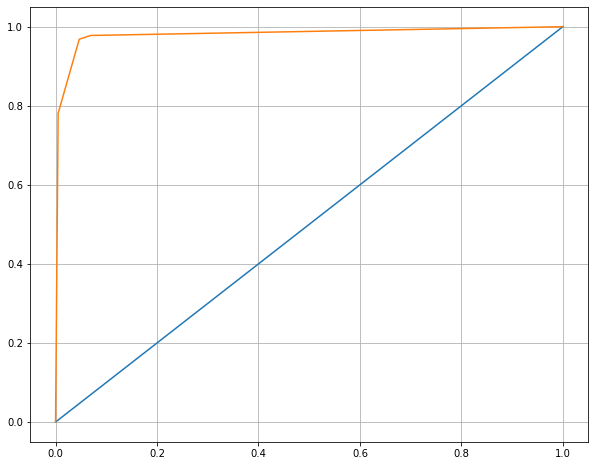

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.grid()
plt.show()